In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import StandardScaler
from numpy import trapz

# Cargar el archivo converted.csv
file_path = "converted.csv"
df = pd.read_csv(file_path)

# Vista previa de los datos
print(df.head())
print(df.info())


   Intensidad        M1      M1.1      M1.2      M1.3        M2      M2.1  \
0    4000.123  0.028301  0.036857  0.027086  0.038974  0.046379  0.041804   
1    3999.641  0.028238  0.036855  0.027155  0.039043  0.046374  0.041753   
2    3999.159  0.028187  0.036844  0.027217  0.039126  0.046374  0.041705   
3    3998.677  0.028154  0.036833  0.027268  0.039211  0.046381  0.041669   
4    3998.195  0.028145  0.036830  0.027300  0.039283  0.046392  0.041655   

       M2.2      M2.3        M3  ...      M7.2      M7.3        M8      M8.1  \
0  0.049717  0.020970  0.039983  ...  0.058690  0.033391  0.032274  0.014542   
1  0.049791  0.020951  0.039960  ...  0.058678  0.033367  0.032182  0.014454   
2  0.049863  0.020930  0.039936  ...  0.058675  0.033339  0.032115  0.014368   
3  0.049923  0.020914  0.039916  ...  0.058681  0.033305  0.032085  0.014298   
4  0.049965  0.020909  0.039899  ...  0.058694  0.033271  0.032096  0.014255   

       M8.2      M8.3        M9      M9.1      M9.2     

In [2]:
# Parámetros de suavizado
window_length = 11  # Longitud de la ventana (debe ser impar)
polyorder = 3       # Orden del polinomio
sigma = 2           # Desviación estándar para el filtro gaussiano

# Aplicar Savitzky-Golay
data_smoothed_sg = savgol_filter(df.iloc[:, 1:], window_length=window_length, polyorder=polyorder, axis=0)
df_smoothed_sg = pd.DataFrame(data_smoothed_sg, columns=df.columns[1:])
df_smoothed_sg.insert(0, 'Intensidad', df['Intensidad'])

# Aplicar filtro Gaussiano
data_smoothed_gaussian = gaussian_filter1d(df.iloc[:, 1:], sigma=sigma, axis=0)
df_smoothed_gaussian = pd.DataFrame(data_smoothed_gaussian, columns=df.columns[1:])
df_smoothed_gaussian.insert(0, 'Intensidad', df['Intensidad'])

print("Suavizado completado.")


Suavizado completado.


In [3]:
# Normalización de los datos

# Normalización por valor máximo
df_normalized_max = df.iloc[:, 1:].div(df.iloc[:, 1:].max(axis=0), axis=1)
df_normalized_max.insert(0, 'Intensidad', df['Intensidad'])

# Normalización por área bajo la curva
areas = trapz(df.iloc[:, 1:].values, dx=1, axis=0)
df_normalized_area = df.iloc[:, 1:].div(areas, axis=1)
df_normalized_area.insert(0, 'Intensidad', df['Intensidad'])

# Normalización Z-Score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, 1:])
df_normalized_zscore = pd.DataFrame(data_scaled, columns=df.columns[1:])
df_normalized_zscore.insert(0, 'Intensidad', df['Intensidad'])

print("Normalización completada.")


Normalización completada.


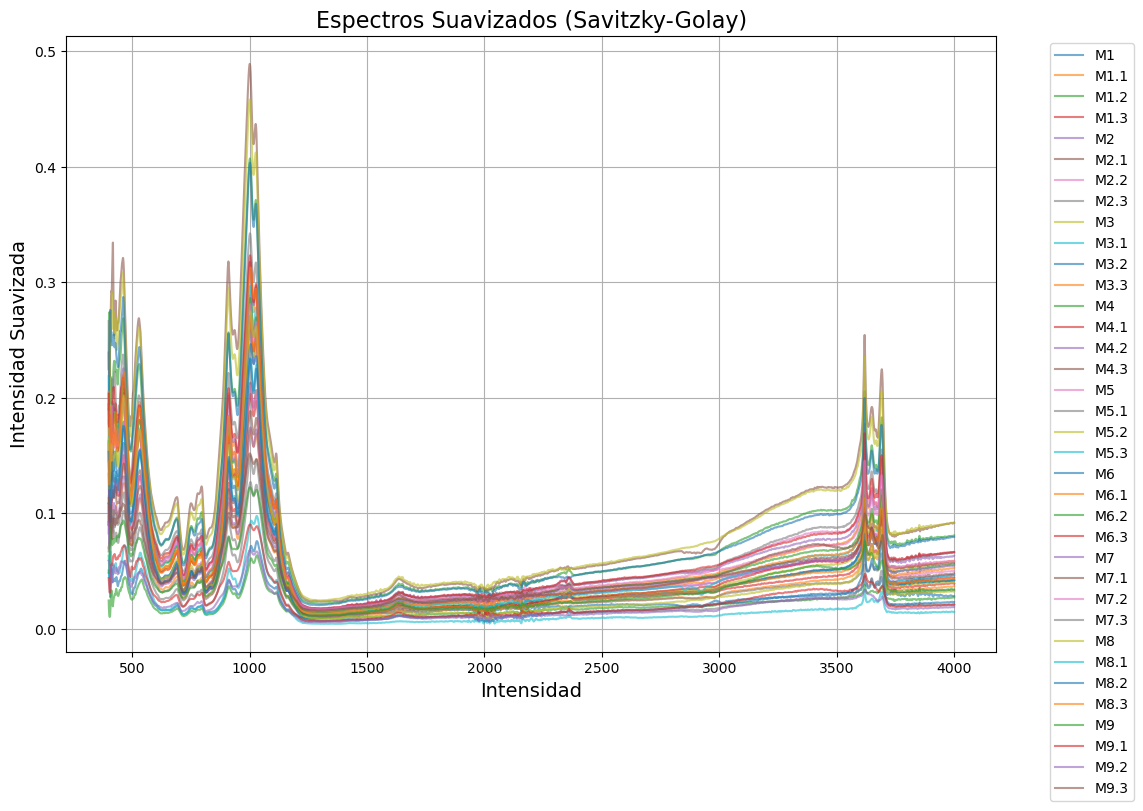

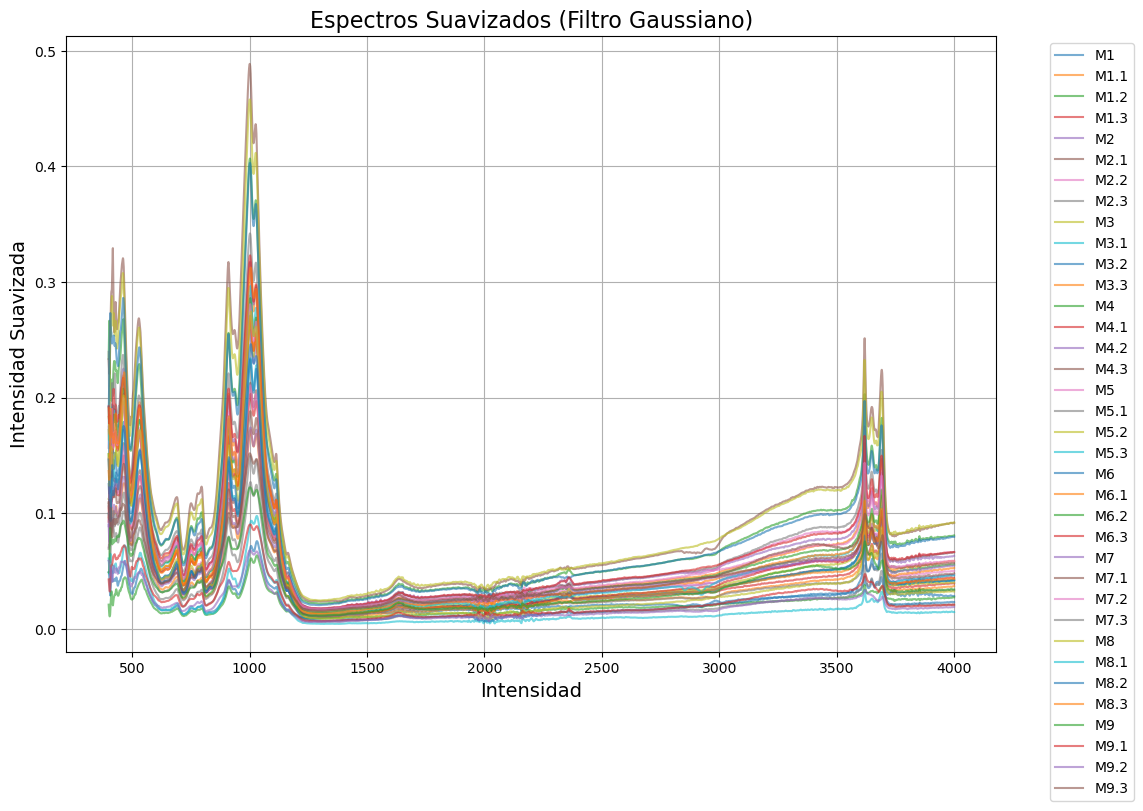

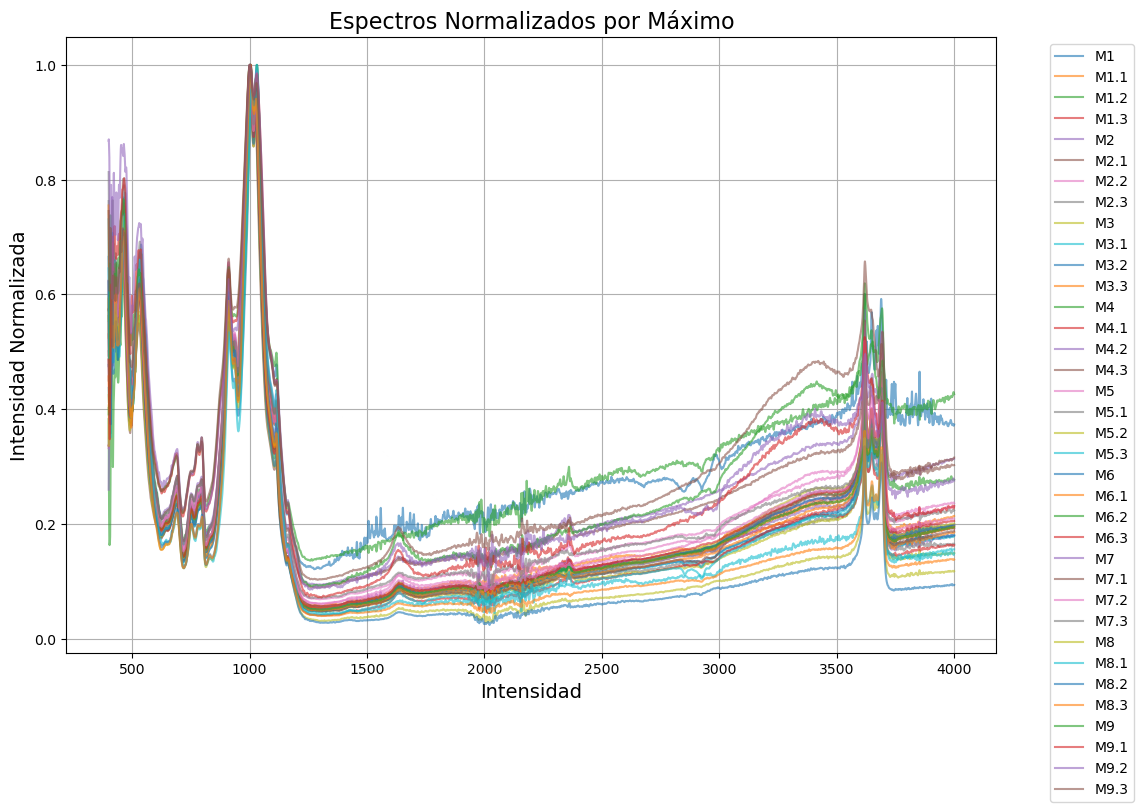

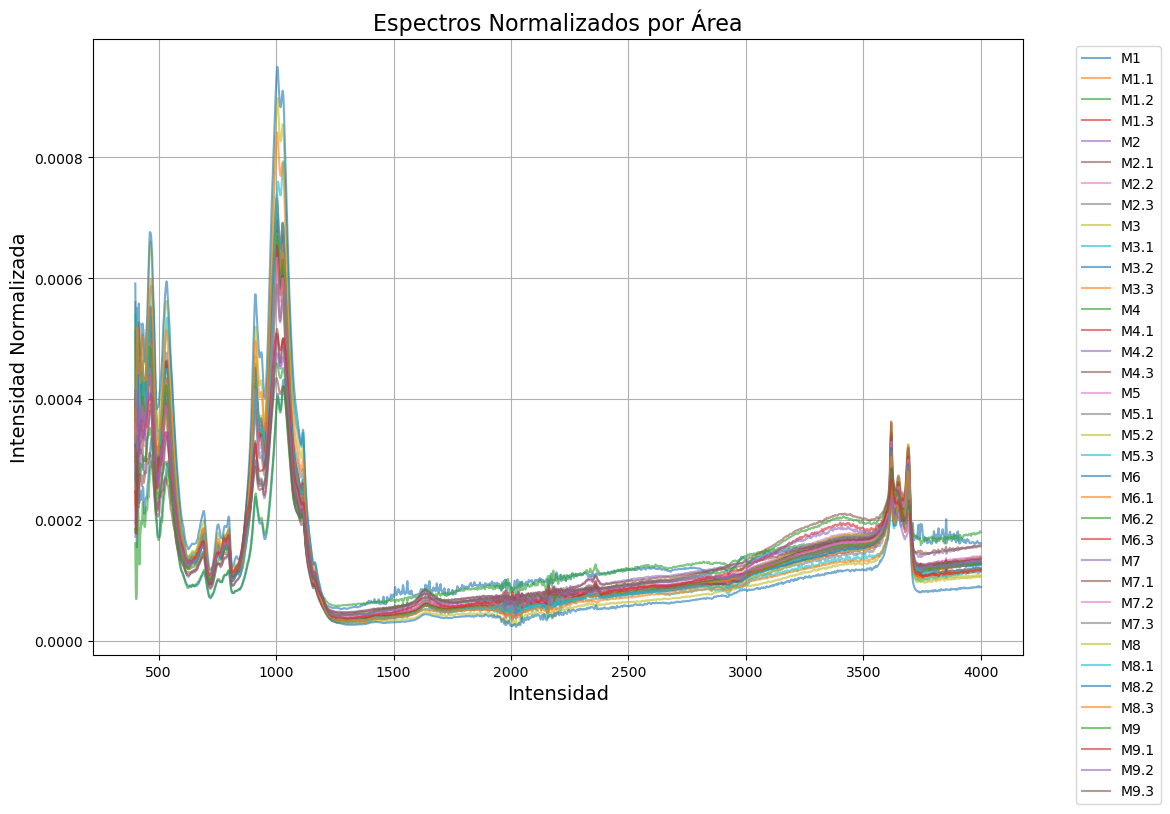

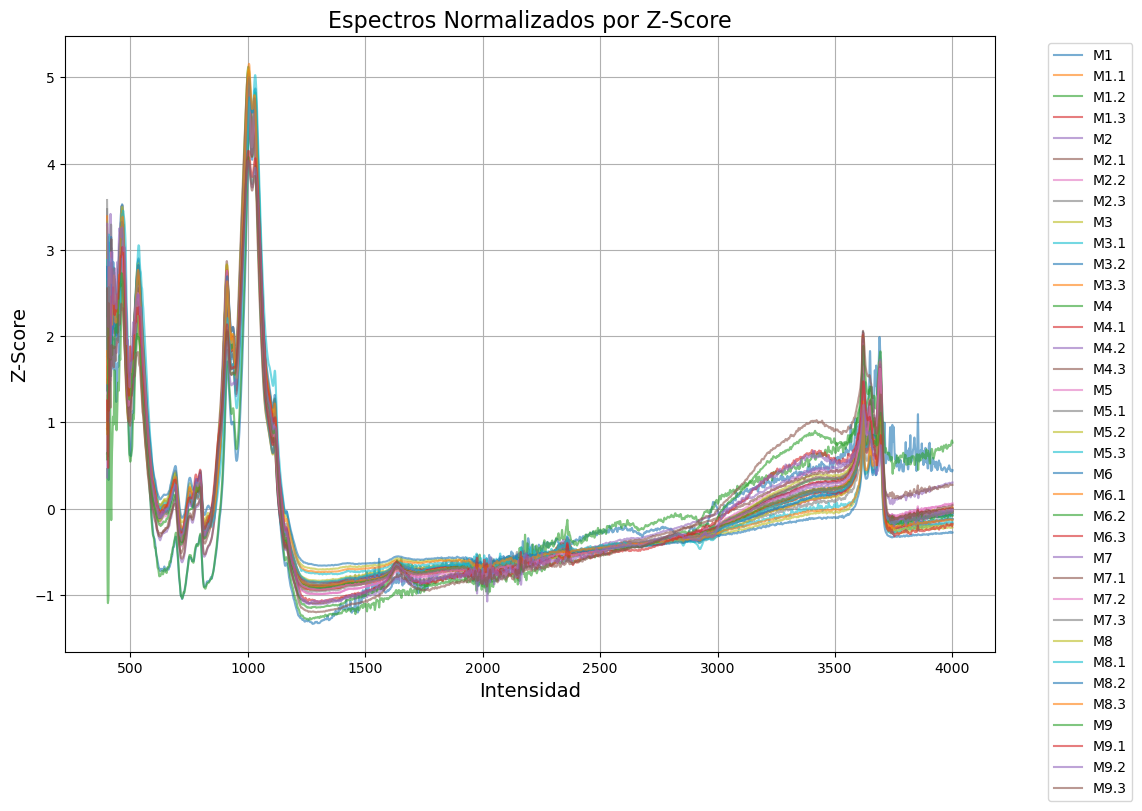

In [4]:
# Graficar los datos suavizados y normalizados

def plot_data(df, title, ylabel):
    plt.figure(figsize=(12, 8))
    for col in df.columns[1:]:
        plt.plot(df['Intensidad'], df[col], label=col, alpha=0.6)
    plt.title(title, fontsize=16)
    plt.xlabel("Intensidad", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.show()

# Graficar los datos suavizados
plot_data(df_smoothed_sg, "Espectros Suavizados (Savitzky-Golay)", "Intensidad Suavizada")
plot_data(df_smoothed_gaussian, "Espectros Suavizados (Filtro Gaussiano)", "Intensidad Suavizada")

# Graficar los datos normalizados
plot_data(df_normalized_max, "Espectros Normalizados por Máximo", "Intensidad Normalizada")
plot_data(df_normalized_area, "Espectros Normalizados por Área", "Intensidad Normalizada")
plot_data(df_normalized_zscore, "Espectros Normalizados por Z-Score", "Z-Score")
